# TASK 2

MOVIE RATING PREDICTION WITH PYTHON 
- Build a model that predicts the rating of a movie based on features like genre, director, and actors. You can use regression techniques to tackle this problem.
- The goal is to analyze historical movie data and develop a model that accurately estimates the rating given to a movie by users or critics.
- Movie Rating Prediction project enables you to explore data analysis, preprocessing, feature engineering, and machine learning modeling techniques. It provides insights into the factors That influence movie ratings and allows you to build a model that can estimate the ratings of movies accurately.

Import Libraries 

In [1]:
import pandas as pd
import numpy as np
import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

Loading the Dataset

In [2]:
df = pd.read_csv('IMDb Movies India.csv', encoding='latin-1')

In [3]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [4]:
df.tail()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN
15508,Zulm-O-Sitam,(1998),130 min,"Action, Drama",6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


In [5]:
df.shape

(15509, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [7]:
df.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [8]:
df.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [9]:
df.isna().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [10]:
missing_values = df.isna().sum()
percentages = (missing_values / len(df)) * 100
result_df = pd.DataFrame({
    'missing values': missing_values.values,
    'percentage': percentages.apply(lambda x: f'{x:.2f}%')  # Format percentages with 2 decimal places and percentage sign
}, index=df.columns)
result_df

,missing values,percentage
Name,0,0.00%
Year,528,3.40%
Duration,8269,53.32%
Genre,1877,12.10%
Rating,7590,48.94%
Votes,7589,48.93%
Director,525,3.39%
Actor 1,1617,10.43%
Actor 2,2384,15.37%
Actor 3,3144,20.27%


In [11]:
df.dropna(subset=['Rating'],inplace=True)

In [12]:
missing_values = df.isna().sum()
percentages = (missing_values / len(df)) * 100

result_df = pd.DataFrame({
    'missing values': missing_values.values,
    'percentage': percentages.apply(lambda x: f'{x:.2f}%')  # Format percentages with 2 decimal places and percentage sign
}, index=df.columns)

result_df

,missing values,percentage
Name,0,0.00%
Year,0,0.00%
Duration,2068,26.11%
Genre,102,1.29%
Rating,0,0.00%
Votes,0,0.00%
Director,5,0.06%
Actor 1,125,1.58%
Actor 2,200,2.53%
Actor 3,292,3.69%


In [13]:
df.dropna(subset=['Actor 1','Actor 2','Actor 3','Director','Genre'],inplace=True)

In [14]:
missing_values = df.isna().sum()
percentages = (missing_values / len(df)) * 100

result_df = pd.DataFrame({
    'missing values': missing_values.values,
    'percentage': percentages.apply(lambda x: f'{x:.2f}%')  # Format percentages with 2 decimal places and percentage sign
}, index=df.columns)

result_df

,missing values,percentage
Name,0,0.00%
Year,0,0.00%
Duration,1899,25.13%
Genre,0,0.00%
Rating,0,0.00%
Votes,0,0.00%
Director,0,0.00%
Actor 1,0,0.00%
Actor 2,0,0.00%
Actor 3,0,0.00%


In [15]:
df['Votes']= df['Votes'].str.replace(',','').astype(int)
df['Year']= df['Year'].str.strip('()').astype(int)
df['Duration']=df['Duration'].str.strip(' min')

In [16]:
df['Duration_copy']=df['Duration']
mask = df['Duration'].isnull()
random_values = np.random.randint(90, 181, size=mask.sum())  # Generate random numbers
df['Duration'][mask] = random_values
org_duration = df.loc[~df['Duration_copy'].isnull(), 'Duration_copy'].astype(int)
df['Duration'] = df['Duration'].astype(int) 

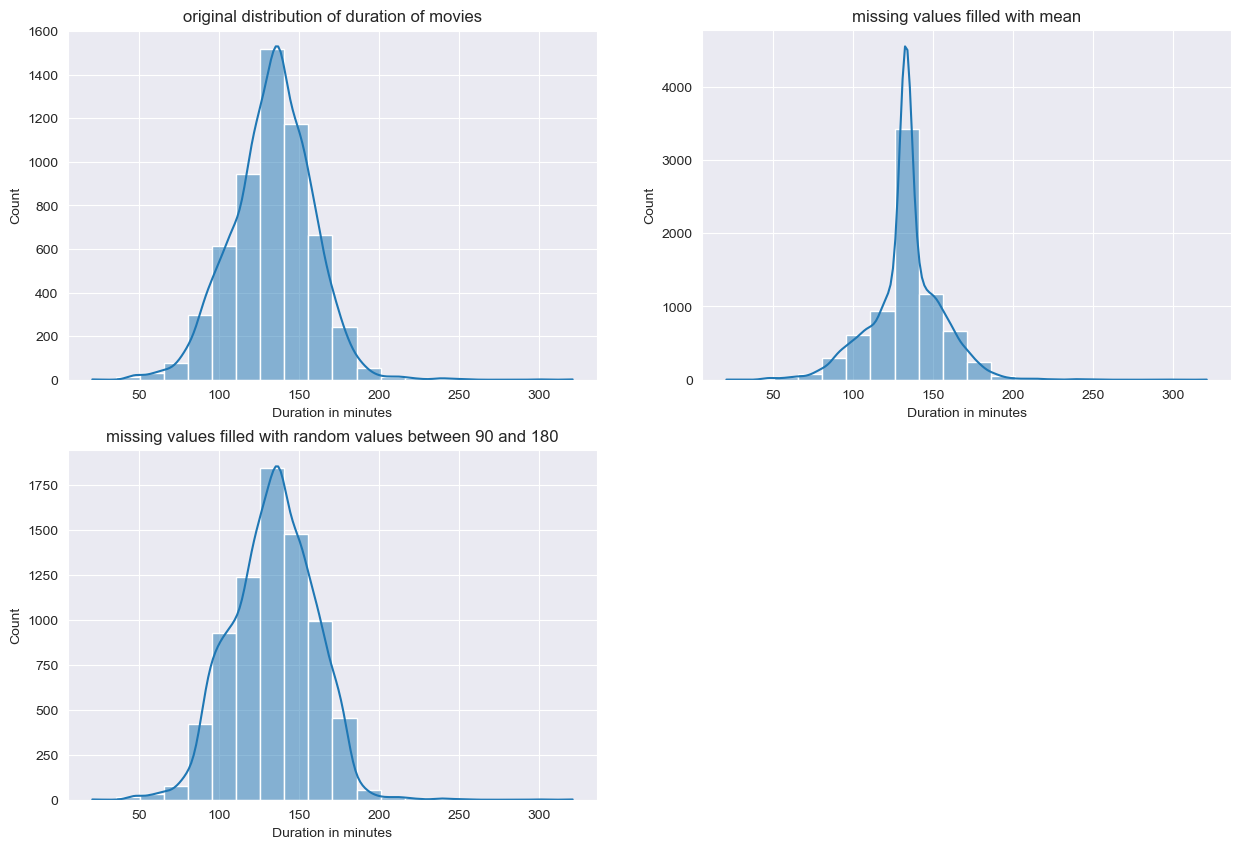

In [17]:
sns.set_style('darkgrid')
fig,ax = plt.subplots(2,2,figsize=(15,10))
sns.histplot(data=org_duration,bins=20,kde=True,ax=ax[0][0])
sns.histplot(data=df,x=df['Duration_copy'].fillna(org_duration.mean()).astype(int),bins=20,kde=True,ax=ax[0][1])
sns.histplot(data=df,x=df['Duration'],bins=20,kde=True,ax=ax[1][0])
ax[0][0].set_xlabel('Duration in minutes')
ax[0][1].set_xlabel('Duration in minutes')
ax[1][0].set_xlabel('Duration in minutes')
ax[0][0].set_title('original distribution of duration of movies')
ax[0][1].set_title('missing values filled with mean')
ax[1][0].set_title('missing values filled with random values between 90 and 180')
fig.delaxes(ax[1][1])
plt.show()

In [18]:
df.drop(columns=['Duration_copy'],inplace=True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7558 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      7558 non-null   object 
 1   Year      7558 non-null   int32  
 2   Duration  7558 non-null   int32  
 3   Genre     7558 non-null   object 
 4   Rating    7558 non-null   float64
 5   Votes     7558 non-null   int32  
 6   Director  7558 non-null   object 
 7   Actor 1   7558 non-null   object 
 8   Actor 2   7558 non-null   object 
 9   Actor 3   7558 non-null   object 
dtypes: float64(1), int32(3), object(6)
memory usage: 560.9+ KB


EDA

In [20]:
top_7_movies = df.loc[df['Rating'].sort_values(ascending=False)[:7].index]
top_7_movies

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
8339,Love Qubool Hai,2020,94,"Drama, Romance",10.0,5,Saif Ali Sayeed,Ahaan Jha,Mahesh Narayan,Rajasree Rajakumari
5410,Half Songs,2021,79,"Music, Romance",9.7,7,Sriram Raja,Raj Banerjee,Emon Chatterjee,Purshottam Mulani
2563,Breed,2020,133,Drama,9.6,48,Bobby Kumar,Bobby Kumar,Ashfaq,Fasih Choudhry
14222,The Reluctant Crime,2020,113,Drama,9.4,16,Arvind Pratap,Dharmendra Ahir,Awanish Kotnal,Rakhi Mansha
5077,Gho Gho Rani,2019,105,"History, Romance",9.4,47,Munni Pankaj,Nishi Neha Mishra,Pankaj Kamal,Akash Kumar
6852,June,2021,93,Drama,9.4,18,Suhrud Godbole,Vaibhav Khisti,Nilesh Divekar,Jitendra Joshi
12673,Secrets of Sinauli,2021,56,"Documentary, History",9.3,1373,Raghav Jairath,Manoj Bajpayee,R.S. Bhist,K.N. Dixit


In [21]:
df.groupby('Year').apply(pd.DataFrame.nlargest, n=1, columns=['Rating'])

,,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
Year,,,,,,,,,,,
1917,8146,Lanka Dahan,1917,132,"Adventure, Drama, Fantasy",6.7,22,Dhundiraj Govind Phalke,Anna Salunke,Ganpat G. Shinde,D.D. Dabke
1931,7203,Kalidas,1931,178,"Drama, History, Musical",6.2,12,H.M. Reddy,T.P. Rajalakshmi,P.G. Venkatesan,L.V. Prasad
1932,6073,Indrasabha,1932,211,"Musical, Romance",6.0,12,J.J. Madan,Nissar,Jehanara Kajjan,Abdul Rehman Kabuli
1933,851,Alif Laila,1933,102,Fantasy,7.2,37,Balwant Bhatt,Shanti Dave,Bashir Qawal,Zohra
1934,9053,Mazdoor,1934,155,Drama,8.5,6,Mohan Dayaram Bhavnani,Bibbo,S.B. Nayampalli,Paidi Jairaj
...,...,...,...,...,...,...,...,...,...,...,...
2017,11841,Rediscovering India,2017,124,Documentary,9.0,62,Meenal Dixit,Benny John,Benny John,Meenal Dixit
2018,1314,Ashok Vatika,2018,97,Drama,9.3,7,Rahul Mallick,Kunj Anand,Sanjay Bishnoi,Paras Zutshi
2019,5077,Gho Gho Rani,2019,105,"History, Romance",9.4,47,Munni Pankaj,Nishi Neha Mishra,Pankaj Kamal,Akash Kumar


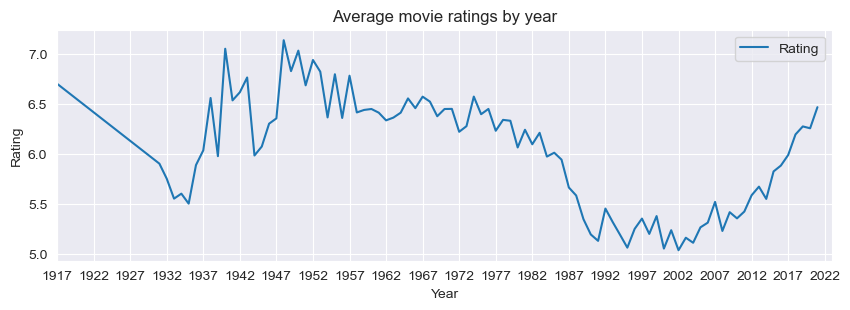

In [22]:
sns.set_style('darkgrid')
df.groupby('Year')[['Rating']].mean().plot(figsize=(10,3))
plt.xlabel('Year')
plt.ylabel('Rating')
plt.title('Average movie ratings by year')
plt.xticks(np.arange(1917,2023,5))
plt.xlim(1917,2023)
plt.show()

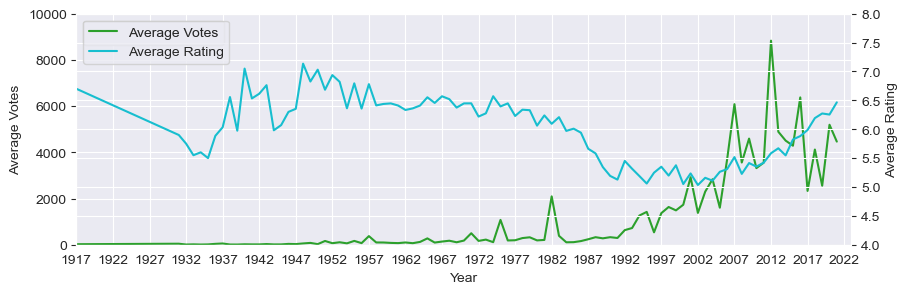

In [23]:
fig,ax1 = plt.subplots(figsize=(10,3))
sns.lineplot(data=df,x='Year',y='Votes',errorbar=None,ax=ax1,label='Average Votes',color='#2ca02c')
ax1.set_xlabel('Year')
ax1.set_ylabel('Average Votes')
ax1.set_xlim(1917,2023)
ax1.set_ylim(0,10000)
ax1.set_xticks(np.arange(1917,2023,5))
ax2 = ax1.twinx()
sns.lineplot(data=df,x='Year',y='Rating',errorbar=None,ax=ax2,color='#17becf',label='Average Rating')
ax2.set_ylabel('Average Rating')
ax2.set_ylim(4,8)
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')
plt.show()

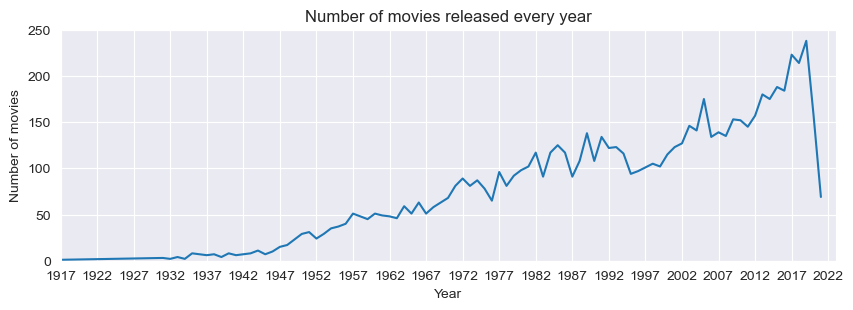

In [24]:
sns.set_style('darkgrid')
df.groupby(['Year'])['Name'].count().plot(figsize=(10,3))
plt.xlabel('Year')
plt.ylabel('Number of movies')
plt.title('Number of movies released every year')
plt.ylim(0,250)
plt.xlim(1917,2023)
plt.xticks(np.arange(1917,2023,5))
plt.show()

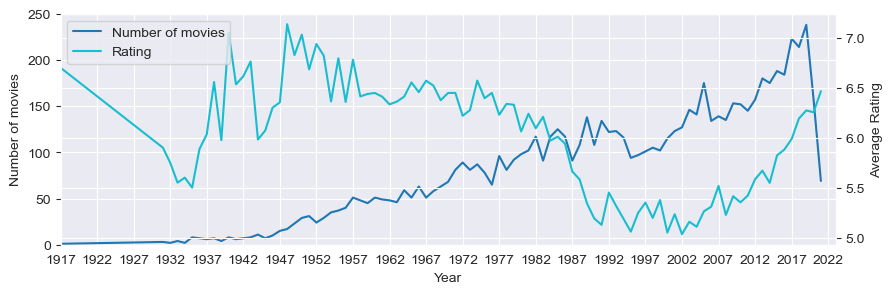

In [25]:
sns.set_style('darkgrid')
fig,ax1 = plt.subplots(figsize=(10,3))
df.groupby(['Year'])['Name'].count().plot(ax=ax1,label='Number of movies')
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of movies')
ax1.set_ylim(0,250)
ax1.set_xlim(1917,2023)
ax1.set_xticks(np.arange(1917,2023,5))
ax2=ax1.twinx()
df.groupby('Year')[['Rating']].mean().plot(ax=ax2,color='#17becf',label='Average rating')
ax2.set_ylabel('Average Rating')
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')
plt.show()

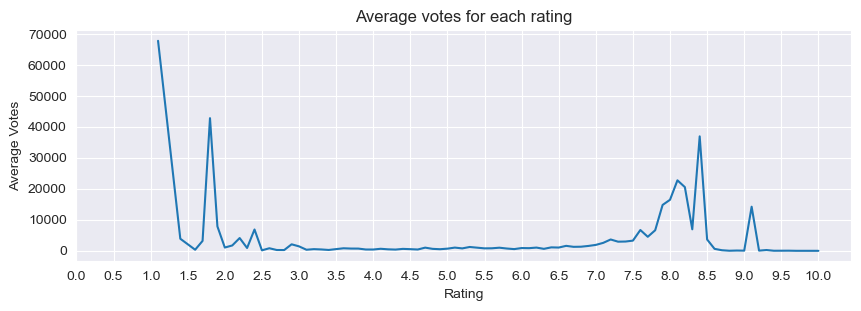

In [26]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,3))
sns.lineplot(data=df,x='Rating',y='Votes',errorbar=None)
plt.xlabel('Rating')
plt.ylabel('Average Votes')
plt.xticks(np.arange(0,10.5,0.5))
plt.title('Average votes for each rating')
plt.show()

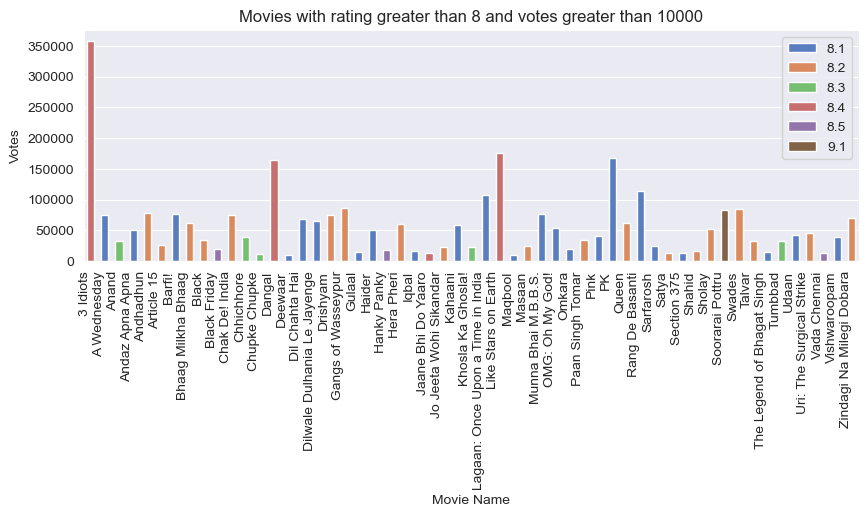

In [27]:
sns.set_style('darkgrid')
d = df.loc[(df['Rating']>8) & (df['Votes']>10000), ['Rating','Votes','Name']]
plt.figure(figsize=(10,3))
ax=sns.barplot(data=d,x='Name',y='Votes',hue='Rating',dodge=False,width=0.5,palette='muted')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')
ax.legend(loc='upper right')
ax.set_xlabel('Movie Name')
ax.set_ylabel('Votes')
ax.set_title('Movies with rating greater than 8 and votes greater than 10000')
plt.show()

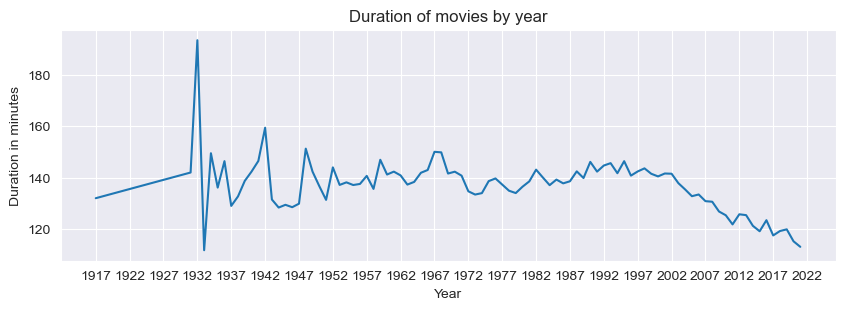

In [28]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,3))
sns.lineplot(data=df,x='Year',y='Duration',errorbar=None)
plt.xlabel('Year')
plt.ylabel('Duration in minutes')
plt.title('Duration of movies by year')
plt.xticks(np.arange(1917,2023,5))
plt.show()

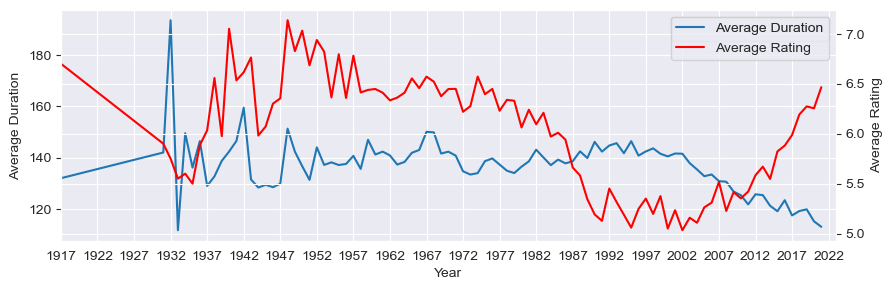

In [29]:
fig,ax1 = plt.subplots(figsize=(10,3))
sns.lineplot(data=df,x='Year',y='Duration',errorbar=None,ax=ax1,label='Average Duration')
ax1.set_xlabel('Year')
ax1.set_ylabel('Average Duration')
ax1.set_xlim(1917,2023)
ax1.set_xticks(np.arange(1917,2023,5))
ax2 = ax1.twinx()
sns.lineplot(data=df,x='Year',y='Rating',errorbar=None,ax=ax2,color='red',label='Average Rating')
ax2.set_ylabel('Average Rating')
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')
plt.show()

Genre Analysis

In [30]:
genre = df['Genre']
genre_stack = genre.str.split(',').apply(pd.Series).stack()
genre_stack.index = genre_stack.index.droplevel(-1)
g=[genre.str.split(',').apply(pd.Series)[i].str.strip().value_counts(dropna=False).to_dict() for i in range(3)]

g_dict = {k: sum(dic.get(k,0) for dic in g) for dic in g for k in dic}
genres_count = pd.Series(g_dict).sort_values(ascending=False).drop(np.nan)

genre_rating = {k:df.loc[df['Genre'].str.contains(k),'Rating'].mean().round(1) for k in genres_count.index}
genre_rating = pd.Series(genre_rating).sort_values(ascending=False)
genres_single = pd.concat([genres_count,genre_rating],axis=1).sort_values(by=1,ascending=False).rename(columns={0:'Movie count',1:'Average rating'})
genres_single.sort_values(by='Movie count',ascending=False,inplace=True)

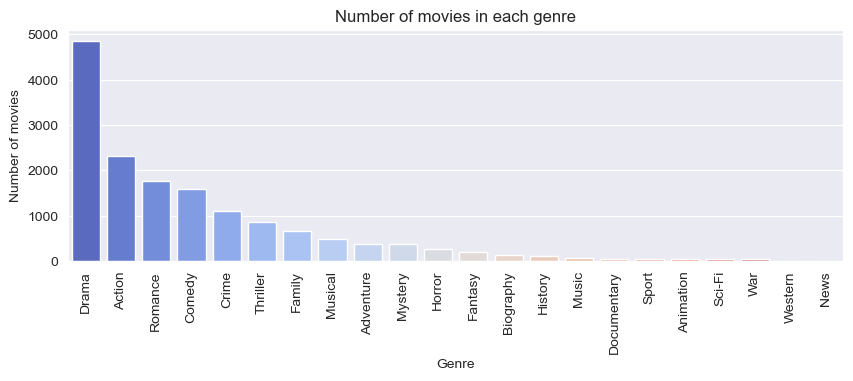

In [31]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,3))
sns.barplot(data=genres_single,x=genres_single.index.values,y='Movie count',palette='coolwarm')
plt.xlabel('Genre')
plt.ylabel('Number of movies')
plt.title('Number of movies in each genre')
plt.xticks(rotation=90)
plt.show()

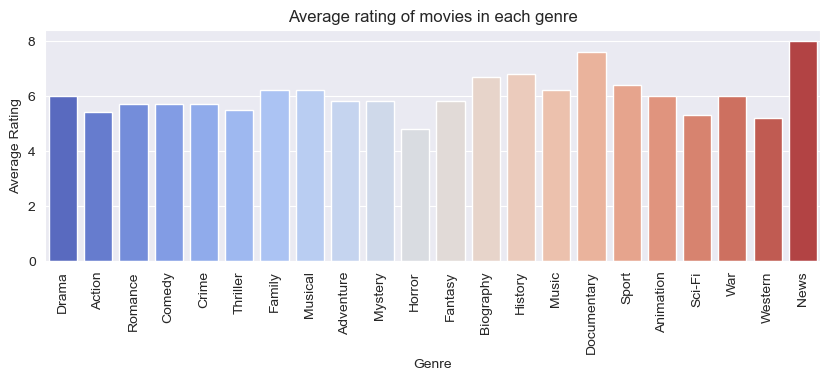

In [32]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,3))
sns.barplot(data=genres_single,x=genres_single.index.values,y='Average rating',palette='coolwarm')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.title('Average rating of movies in each genre')
plt.xticks(rotation=90)
plt.show()

In [33]:
genre_df = df.groupby('Genre').agg({'Rating':['mean','count']})
genre_df.reset_index(inplace=True)
genre_df.columns = ['Genre','Average Rating','Movie Count']
genre_df['Average Rating'] = genre_df['Average Rating'].round(1)
genre_df

,Genre,Average Rating,Movie Count
0,Action,5.0,391
1,"Action, Adventure",5.6,24
2,"Action, Adventure, Biography",7.8,1
3,"Action, Adventure, Comedy",5.6,40
4,"Action, Adventure, Crime",5.6,16
...,...,...,...
411,"Thriller, Action",4.3,1
412,"Thriller, Musical, Mystery",7.1,1
413,"Thriller, Mystery",6.5,3
414,"Thriller, Mystery, Family",6.1,1


Directors Analysis

In [34]:
directors  = df.groupby('Director').agg({'Rating':['mean','count']})
directors.columns = directors.columns.droplevel(0)
directors.reset_index(inplace=True)
directors.columns = ['Director','Average Rating','Movie count']
directors['Average Rating'] = directors['Average Rating'].round(1)
directors.sort_values(by='Movie count',ascending=False,inplace=True)
directors.head()

,Director,Average Rating,Movie count
1336,Mahesh Bhatt,5.5,45
586,David Dhawan,5.2,43
899,Hrishikesh Mukherjee,7.1,42
2408,Shakti Samanta,6.6,38
1155,Kanti Shah,4.9,37


In [35]:
directors_dict = dict(zip(directors['Director'],directors['Average Rating']))

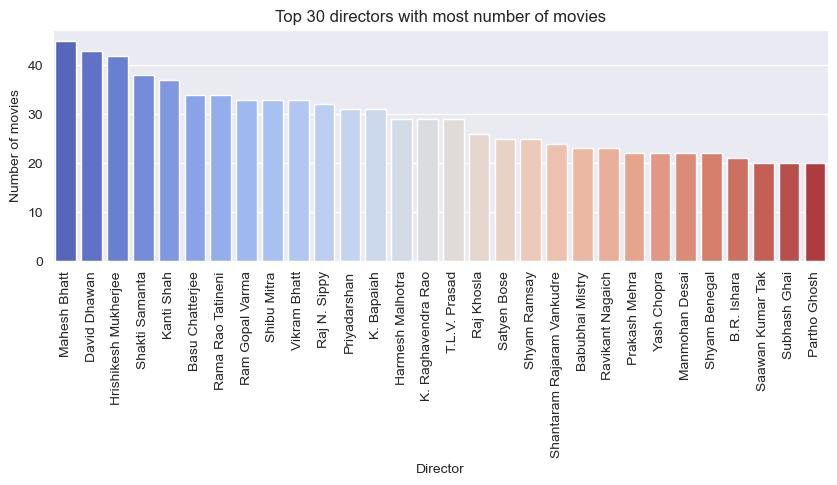

In [36]:
plt.figure(figsize=(10,3))
sns.set_style('darkgrid')
sns.barplot(data=directors.head(30),x='Director',y='Movie count',palette='coolwarm')
plt.xlabel('Director')
plt.ylabel('Number of movies')
plt.xticks(rotation=90)
plt.title('Top 30 directors with most number of movies')
plt.show()

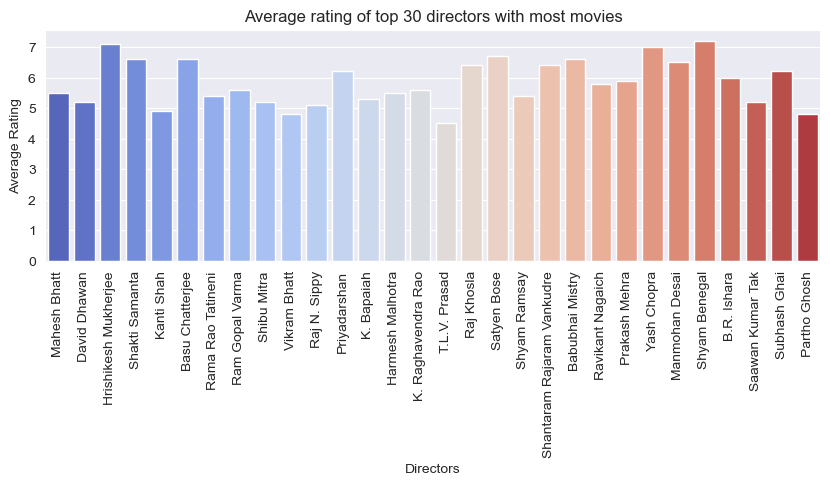

In [37]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,3))
sns.barplot(data=directors.head(30),x='Director',y='Average Rating',palette='coolwarm')
plt.xticks(rotation=90)
plt.xlabel('Directors')
plt.ylabel('Average Rating')
plt.title('Average rating of top 30 directors with most movies')
plt.show()

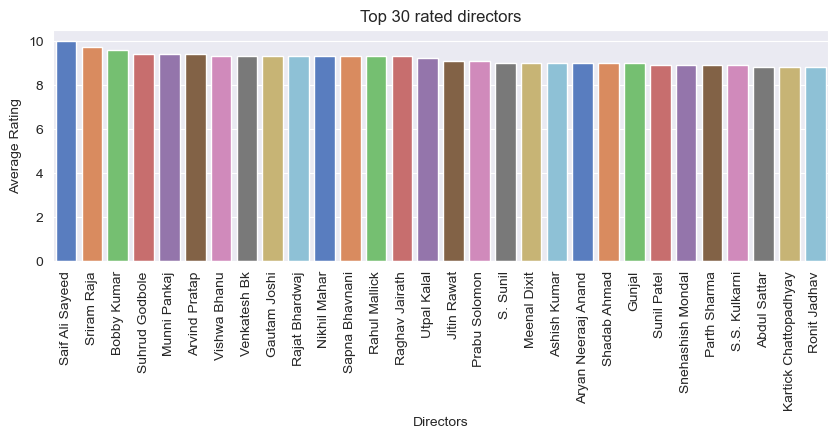

In [38]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,3))
sns.barplot(data=directors.sort_values(by='Average Rating',ascending=False).head(30) ,x='Director',y='Average Rating',palette='muted')
plt.xticks(rotation=90)
plt.xlabel('Directors')
plt.ylabel('Average Rating')
plt.title('Top 30 rated directors')
plt.show()

Actors Analysis

In [39]:
df_melted = df.melt(id_vars='Rating', value_name='actor', var_name='role', value_vars=['Actor 1', 'Actor 2', 'Actor 3'])
actor_scores = df_melted.groupby('actor')['Rating'].agg(['mean', 'count'])
actor_scores.reset_index(inplace=True)
actor_scores.columns = ['Actor','Average Score', 'Number of movies']
actor_scores.sort_values('Number of movies', ascending=False, inplace=True)
actor_scores['Average Score']=actor_scores['Average Score'].round(1)
actor_scores

,Actor,Average Score,Number of movies
2990,Mithun Chakraborty,5.3,231
1395,Dharmendra,5.8,217
2091,Jeetendra,5.4,179
821,Ashok Kumar,6.4,173
425,Amitabh Bachchan,6.2,162
...,...,...,...
2358,Kavitha,4.9,1
2357,Kavita Tripathi,6.8,1
2355,Kavita Kapoor,4.8,1
2354,Kavita Joshi,6.6,1


In [40]:
actor_score_dict = dict(zip(actor_scores['Actor'], actor_scores['Average Score']))

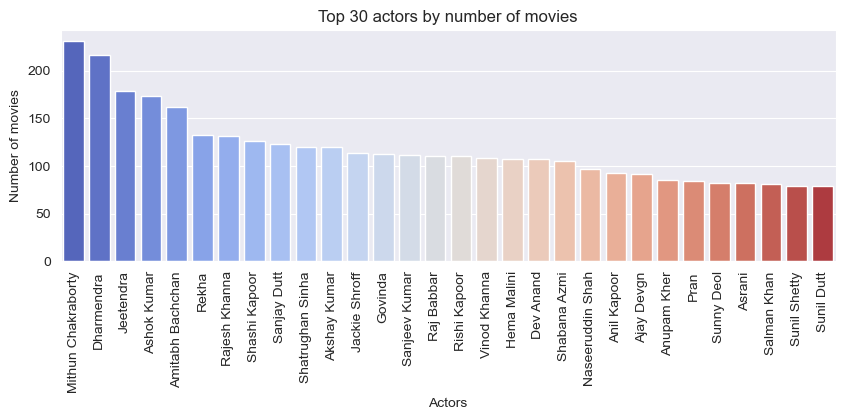

In [41]:
plt.figure(figsize=(10,3))
sns.barplot(data=actor_scores[:30],x='Actor',y='Number of movies',dodge=False,palette='coolwarm')
plt.xticks(rotation=90)
plt.xlabel('Actors')
plt.ylabel('Number of movies')
plt.title('Top 30 actors by number of movies')
plt.show()

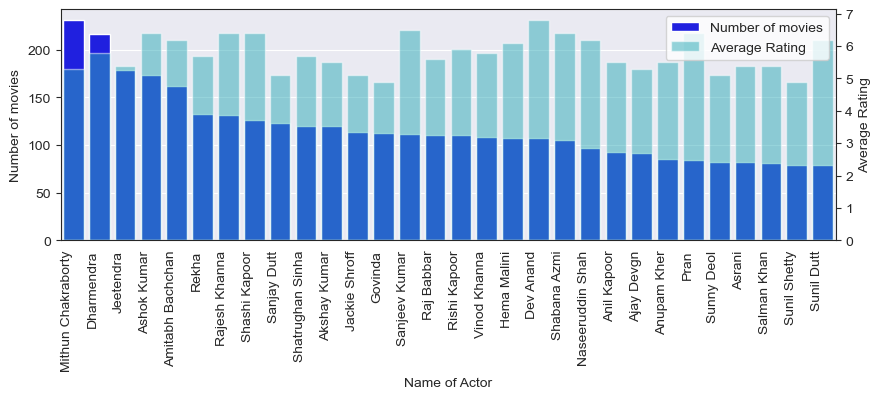

In [42]:
fig,ax1 = plt.subplots(figsize=(10,3))
sns.set_style('white')
sns.barplot(data=actor_scores[:30],x='Actor',y='Number of movies',dodge=True,ax=ax1,label='Number of movies',color='blue')
ax1.set(xlabel='Name of Actor', ylabel='Number of movies')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha='right')
ax2 = ax1.twinx()
sns.barplot(data=actor_scores[:30],x='Actor',y='Average Score',dodge=True,ax=ax2,color='#17becf',label='Average Rating',alpha=0.5)
ax2.set_ylabel('Average Rating')
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')
plt.show()

In [43]:
actor_scores.sort_values(by='Average Score',ascending=False,inplace=True)

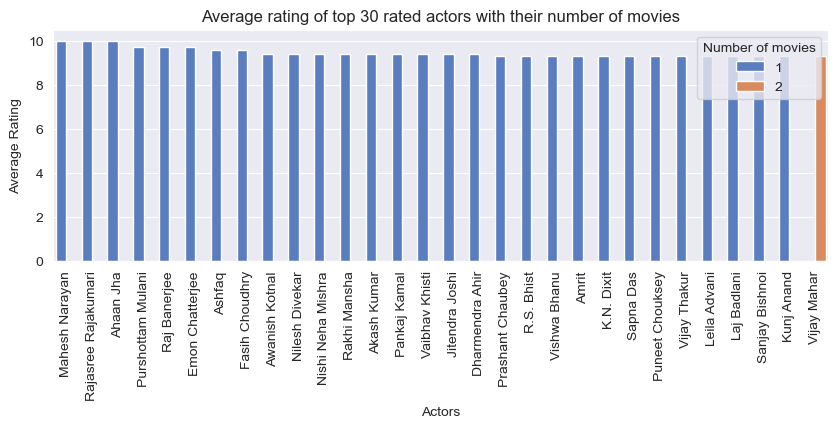

In [44]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,3))
sns.barplot(data=actor_scores[:30],x='Actor',y='Average Score',dodge=True,hue='Number of movies',palette='muted')
plt.xticks(rotation=90)
plt.xlabel('Actors')
plt.ylabel('Average Rating')
plt.title('Average rating of top 30 rated actors with their number of movies')
plt.show()

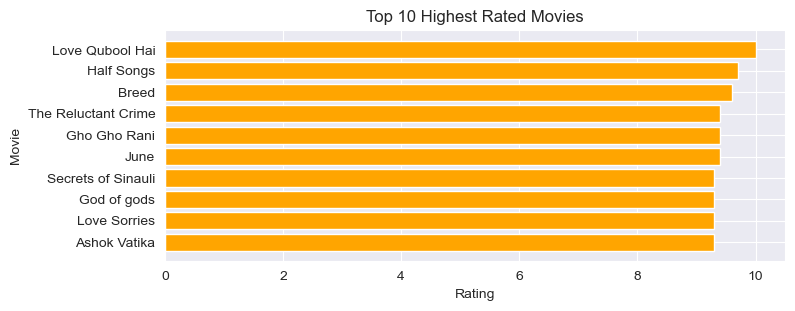

In [46]:
top_rated_movie = df.sort_values(by='Rating',ascending=False).head(10)
plt.figure(figsize=(8,3))
plt.barh(top_rated_movie['Name'],top_rated_movie['Rating'],color='orange')
plt.xlabel('Rating')
plt.ylabel('Movie')
plt.title('Top 10 Highest Rated Movies')
plt.gca().invert_yaxis()
plt.show()

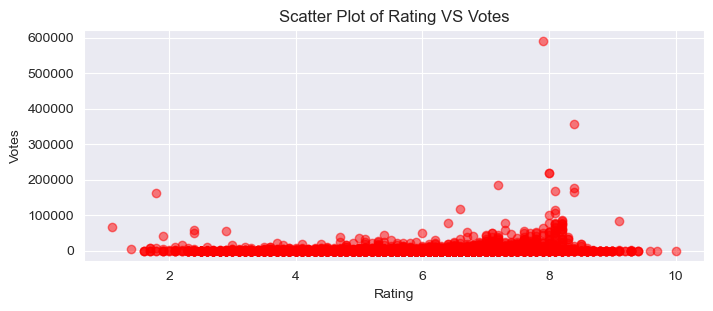

In [47]:
df['Votes']=pd.to_numeric(df['Votes'],errors='coerce')
plt.figure(figsize=(8,3))
plt.scatter(df['Rating'],df['Votes'],alpha=0.5,color='r')
plt.xlabel('Rating')
plt.ylabel('Votes')
plt.title('Scatter Plot of Rating VS Votes')
plt.grid(True)
plt.show()

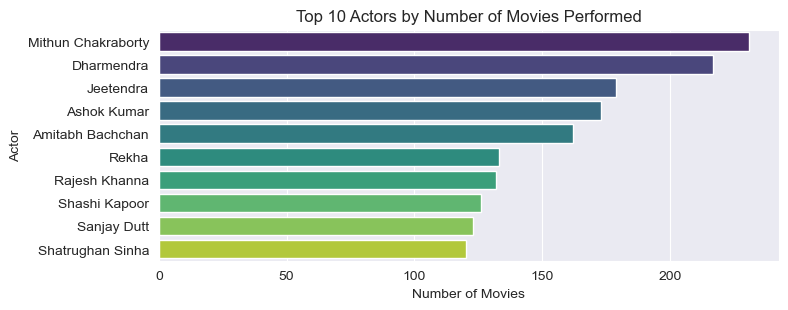

In [48]:
actor = pd.concat([df['Actor 1'],df['Actor 2'],df['Actor 3']])
actor_count = actor.value_counts().reset_index()
actor_count.columns=['Actor','Number of Movies']
plt.figure(figsize=(8,3))
sns.barplot(x='Number of Movies',y='Actor',data=actor_count.head(10),palette='viridis')
plt.xlabel('Number of Movies')
plt.ylabel('Actor')
plt.title('Top 10 Actors by Number of Movies Performed')
plt.show()

In [49]:
x = df.drop(['Name','Genre','Rating','Director','Actor 1','Actor 2','Actor 3'],axis=1)
y = df['Rating']

In [50]:
x.head()

,Year,Duration,Votes
1,2019,109,8
3,2019,110,35
5,1997,147,827
6,2005,142,1086
8,2012,82,326


In [51]:
y.head()

1    7.0
3    4.4
5    4.7
6    7.4
8    5.6
Name: Rating, dtype: float64

Model Building

In [52]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [53]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x_train,y_train)
lr_preds = LR.predict(x_test)
print(lr_preds)

[5.47299392 6.03494585 5.75044681 ... 5.9554252  5.56530615 5.68834808]


In [54]:
from sklearn.metrics import mean_squared_error, r2_score as score

In [55]:
def evaluate_model(y_true,y_pred,model_name):
    print("Model: ",model_name)
    print("Accuracy = {:0.2f}%".format(score(y_true,y_pred)*100))
    print("Mean Squared Error = {:0.2f}\n".format(mean_squared_error(y_true,y_pred,squared=False)))
    return round(score(y_true,y_pred)*100, 2)

In [56]:
LRScore = evaluate_model(y_test,lr_preds,"LINEAR REGRESSION")

Model:  LINEAR REGRESSION
Accuracy = 7.23%
Mean Squared Error = 1.32



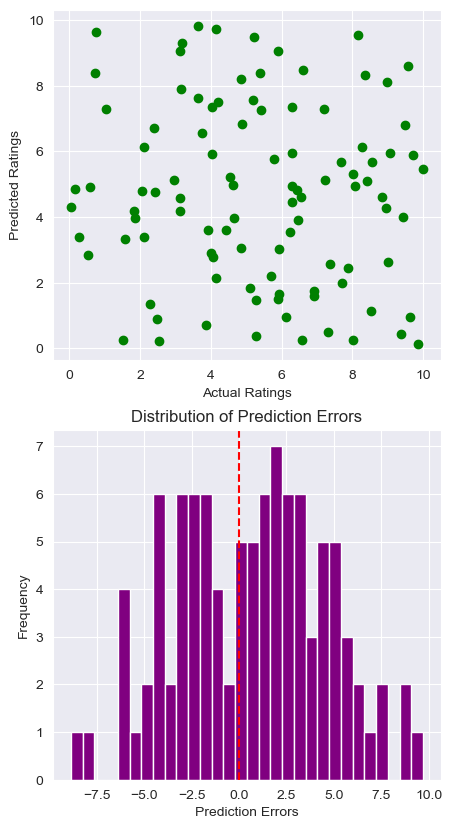

In [57]:
y_test = np.random.rand(100)*10
y_pred = np.random.rand(100)*10
error = y_test - y_pred
fig,axs = plt.subplots(2,1,figsize=(5,10))

axs[0].scatter(y_test,y_pred,color='green')
axs[0].set_xlabel('Actual Ratings')
axs[0].set_ylabel('Predicted Ratings')

axs[1].hist(error,bins=30,color='purple')
axs[1].set_xlabel('Prediction Errors')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Distribution of Prediction Errors')
axs[1].axvline(x=0,color='r',linestyle='--')
plt.show()